# Overview of ACTR

Background on **ACTR** (fill in).

This data was downloaded from DE. Shaw

## Configuration

First, let's configure the notebook for use by importing the relevant packages and performing any necessary setup before use.

In [1]:
import nglview
import numpy as np
import mdtraj as md
from camparitraj.cttrajectory import CTTrajectory

Next, we configure the **matplotlib** package for generating user-friendly and editable images.

In [2]:
import matplotlib
import matplotlib.pyplot as plt

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# This defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

With all the necessary imports initialized, let's load and examine the **ACTR** trajectory. Although in this example we use PDB files for topology and XTC files for the trajectory, any of the file formats that **mdtraj** supports can be loaded.

In [3]:
topology_filename = './data/actr/full.pdb'
trajectory_filename = './data/actr/full.xtc'
trajectory = CTTrajectory(trajectory_filename, topology_filename)

print(trajectory)
print(trajectory.traj)

CTTrajectory (0x7fbf670eabb0): 1 proteins and 29977 frames
<mdtraj.Trajectory with 29977 frames, 1072 atoms, 74 residues, and unitcells>


As **camparitraj** utilizes **mdtraj** as a base library, it encapsulates an `mdtraj.Trajectory` object which provides access to more granular detail of the trajectory's properties such as the number of atoms and residues. In contrast, **camparitraj** provides a more abtract overview of the trajectory properties, providing information such as the number of proteins.

Let's examine those properties in detail:

In [4]:
# Determine the number of proteins (1 in this case):
print('Number of proteins: {}'.format(trajectory.num_proteins))

# Since this trajectory only contains 1 protein, let's examine the number of residues contained therein:
protein = trajectory.proteinTrajectoryList[0]

# We can also output the number of residues contained within the protein and their indices:
print('Number of residues within protein: {}'.format(protein.n_residues))
print(protein.print_residues())

Number of proteins: 1
Number of residues within protein: 74
0 --> GLY-1
1 --> THR-2
2 --> GLN-3
3 --> ASN-4
4 --> ARG-5
5 --> PRO-6
6 --> LEU-7
7 --> LEU-8
8 --> ARG-9
9 --> ASN-10
10 --> SER-11
11 --> LEU-12
12 --> ASP-13
13 --> ASP-14
14 --> LEU-15
15 --> VAL-16
16 --> GLY-17
17 --> PRO-18
18 --> PRO-19
19 --> SER-20
20 --> ASN-21
21 --> LEU-22
22 --> GLU-23
23 --> GLY-24
24 --> GLN-25
25 --> SER-26
26 --> ASP-27
27 --> GLU-28
28 --> ARG-29
29 --> ALA-30
30 --> LEU-31
31 --> LEU-32
32 --> ASP-33
33 --> GLN-34
34 --> LEU-35
35 --> HIS-36
36 --> THR-37
37 --> LEU-38
38 --> LEU-39
39 --> SER-40
40 --> ASN-41
41 --> THR-42
42 --> ASP-43
43 --> ALA-44
44 --> THR-45
45 --> GLY-46
46 --> LEU-47
47 --> GLU-48
48 --> GLU-49
49 --> ILE-50
50 --> ASP-51
51 --> ARG-52
52 --> ALA-53
53 --> LEU-54
54 --> GLY-55
55 --> ILE-56
56 --> PRO-57
57 --> GLU-58
58 --> LEU-59
59 --> VAL-60
60 --> ASN-61
61 --> GLN-62
62 --> GLY-63
63 --> GLN-64
64 --> ALA-65
65 --> LEU-66
66 --> GLU-67
67 --> PRO-68
68 --> 

We can also visually examine the trajectory via **nglview**.

In [5]:
view = nglview.show_mdtraj(trajectory.traj)
view

NGLWidget(max_frame=29976)

As **ACTR** exhibits significant conformational heterogeneity as the chain undergoes elongation and collapse across the trajectory frames. To characterize its behavior, we can analyze a couple properties of interest:

1. **Asphericity vs Rg**: Asphericity ($\delta$) is a shape parameter which estimates the deviation of a protein's conformation from that of a sphere. The value ranges from 0 (sphere-like) to 1 (rod-like). By comparing its values with that of $R_g$ we can assess how often the protein is compacted and elongated.

2. **Internal Scaling**: Internal scaling is an end-to-end distance measure used to measure the radius between inter-residue pairs along the chain length, at some separation interval. Plotting this distance as a function of the residues at the provided separation interval can illustrate the collapsed or expanded behavior of the residues along the chain.

## Asphericity vs Rg

From our prior examinations, we confirmed that the **ACTR** protein has 74 residues and has a trajectory with high conformational heterogeneity. One way of introspecting the properties further is to examine the **asphericity** and the the **$R_g$**.

If the chain has undergone local collapse or occupies a compact globule, the corresponding **asphericity vs. $R_g$** profile will contain regions at low asphericity. Converesely, if the chain occupies an expanded state, its profile will contain regions at high asphericity.

Since **ACTR** is an IDP, we anticipate that the profile will be diverse.

In [6]:
start_residue = 0
end_residue = protein.n_residues - 1
asphericity = protein.get_asphericity(start_residue, end_residue)
radius_of_gyration = protein.get_radius_of_gyration(start_residue, end_residue)

STATUS: On frame 500 of 29977 [computing gyration tensor]
STATUS: On frame 1000 of 29977 [computing gyration tensor]
STATUS: On frame 1500 of 29977 [computing gyration tensor]
STATUS: On frame 2000 of 29977 [computing gyration tensor]
STATUS: On frame 2500 of 29977 [computing gyration tensor]
STATUS: On frame 3000 of 29977 [computing gyration tensor]
STATUS: On frame 3500 of 29977 [computing gyration tensor]
STATUS: On frame 4000 of 29977 [computing gyration tensor]
STATUS: On frame 4500 of 29977 [computing gyration tensor]
STATUS: On frame 5000 of 29977 [computing gyration tensor]
STATUS: On frame 5500 of 29977 [computing gyration tensor]
STATUS: On frame 6000 of 29977 [computing gyration tensor]
STATUS: On frame 6500 of 29977 [computing gyration tensor]
STATUS: On frame 7000 of 29977 [computing gyration tensor]
STATUS: On frame 7500 of 29977 [computing gyration tensor]
STATUS: On frame 8000 of 29977 [computing gyration tensor]
STATUS: On frame 8500 of 29977 [computing gyration tensor

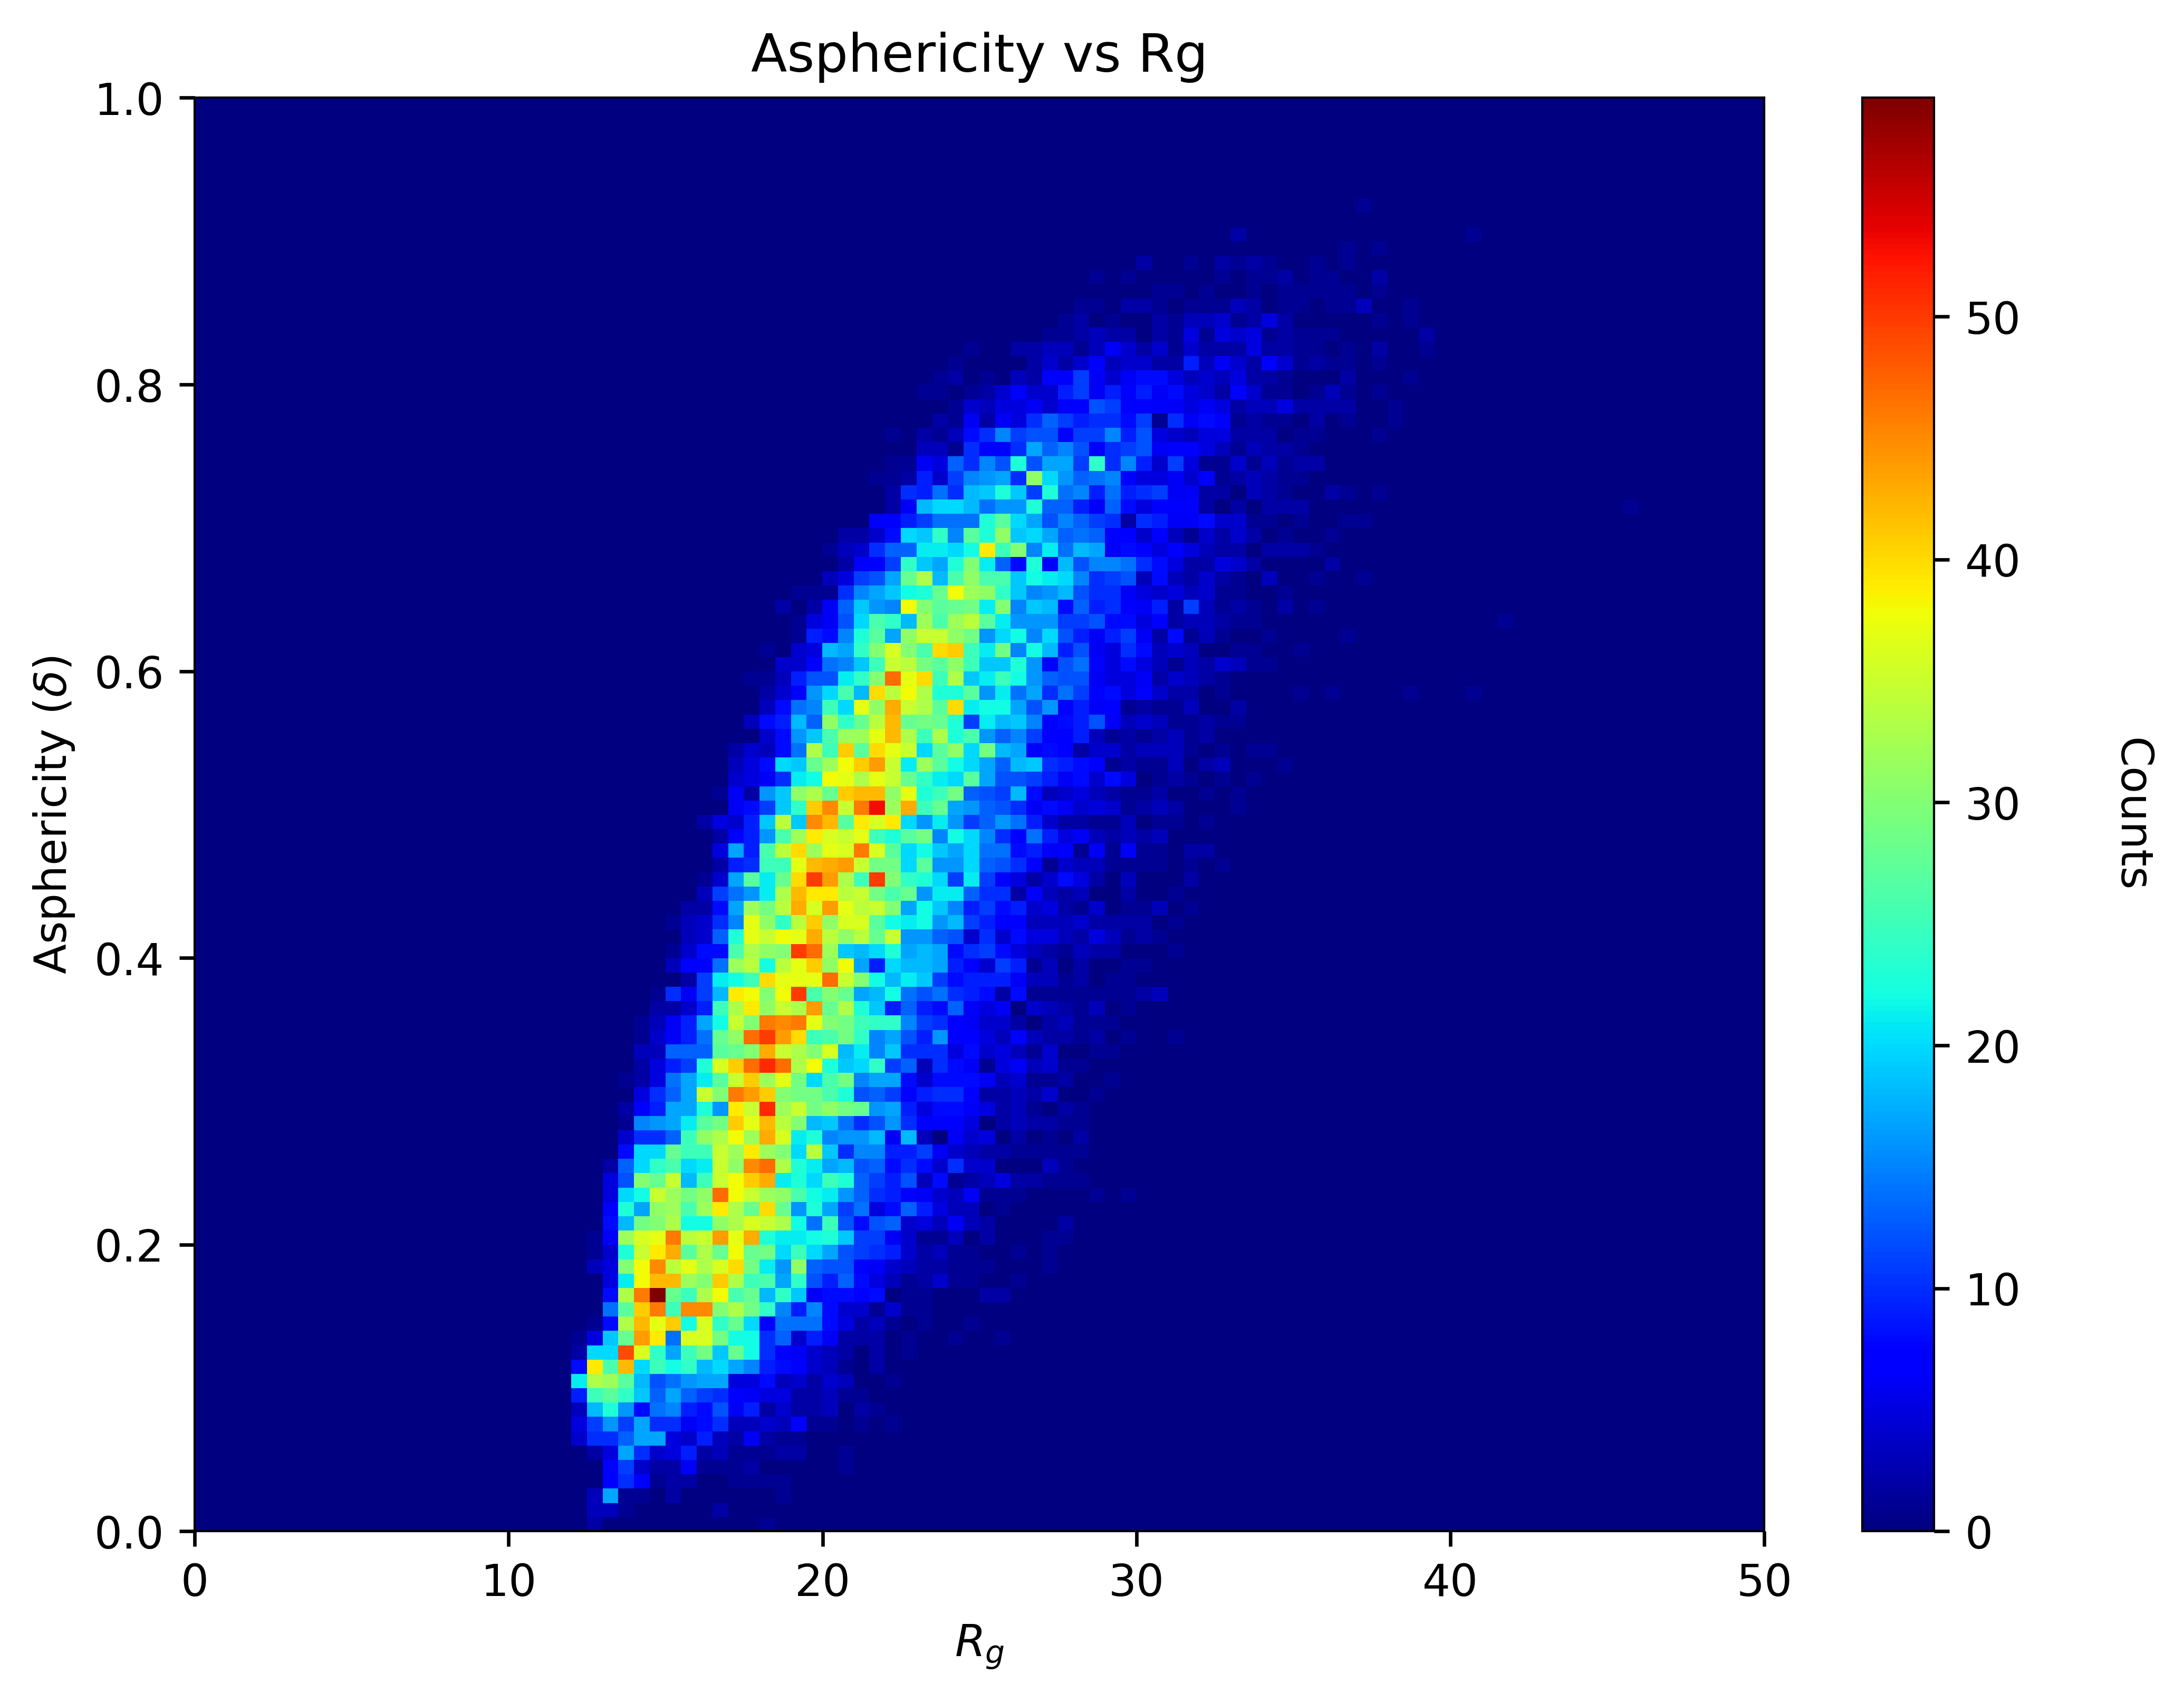

In [22]:
# Now that we have the asphericity and R_g, let's examine them to get a sense of the spatial properties
def plot_asphericity_vs_Rg(radius_of_gyration, asphericity, num_bins=100, max_Rg=50, max_asphericity=1.0):
    """This function plots the asphericity vs Rg for a given number of bins.
    
        @param radius_of_gyration: A 1D `numpy.array` or list containing the calculated radius of 
                                   gyration. This parameter is meant to be calculated from
                                   `camparitraj.CTProtein.get_radius_of_gyration`.
                                   
        @param asphericity: A 1D `numpy.array` or list containing the calculated radius of gyration. 
                            This parameter is meant to be calculated from 
                            `camparitraj.CTProtein.get_radius_of_gyration`.
                            
        @param num_bins: The number of bins (int) to use when creating the 2D histogram representation
                         of the asphericity vs Rg plot.
                         
        @param max_Rg: The upper limit of the Rg to use when creating the 2D histogram.
        
        @param max_asphericity: The upper limit of asphericity to use when creating the 2D histogram.
        
        @return None
    """
    fig = plt.figure(figsize=(8, 6), dpi=300)
    ax = fig.add_subplot(111)
    ax.set_title('Asphericity vs Rg')
    ax.set_xlabel('$R_g$')
    ax.set_ylabel('Asphericity ($\delta$)')
    xedges = np.linspace(0, max_Rg, num_bins + 1)
    yedges = np.linspace(0, max_asphericity, num_bins + 1)
    _hist, _xedges, _yedges, im = ax.hist2d(radius_of_gyration, asphericity, bins=(xedges, yedges), cmap='jet')
    colorbar = fig.colorbar(im)
    colorbar.set_label('Counts', rotation=270, labelpad=30)
    plt.show()
    plt.close(fig)

    
plot_asphericity_vs_Rg(radius_of_gyration, asphericity)

As we observe, the **Asphericity vs. $R_g$** plot indicates that the conformational ensemble of **ACTR** is dominated by states where it is elongated or undergone expansion. However, it is also evident that the protein has also undergone compaction given the existence of pockets at low asphericity. We can interrogate this behavior further by examining the end-to-end distance of the protein over the course of the simulation.

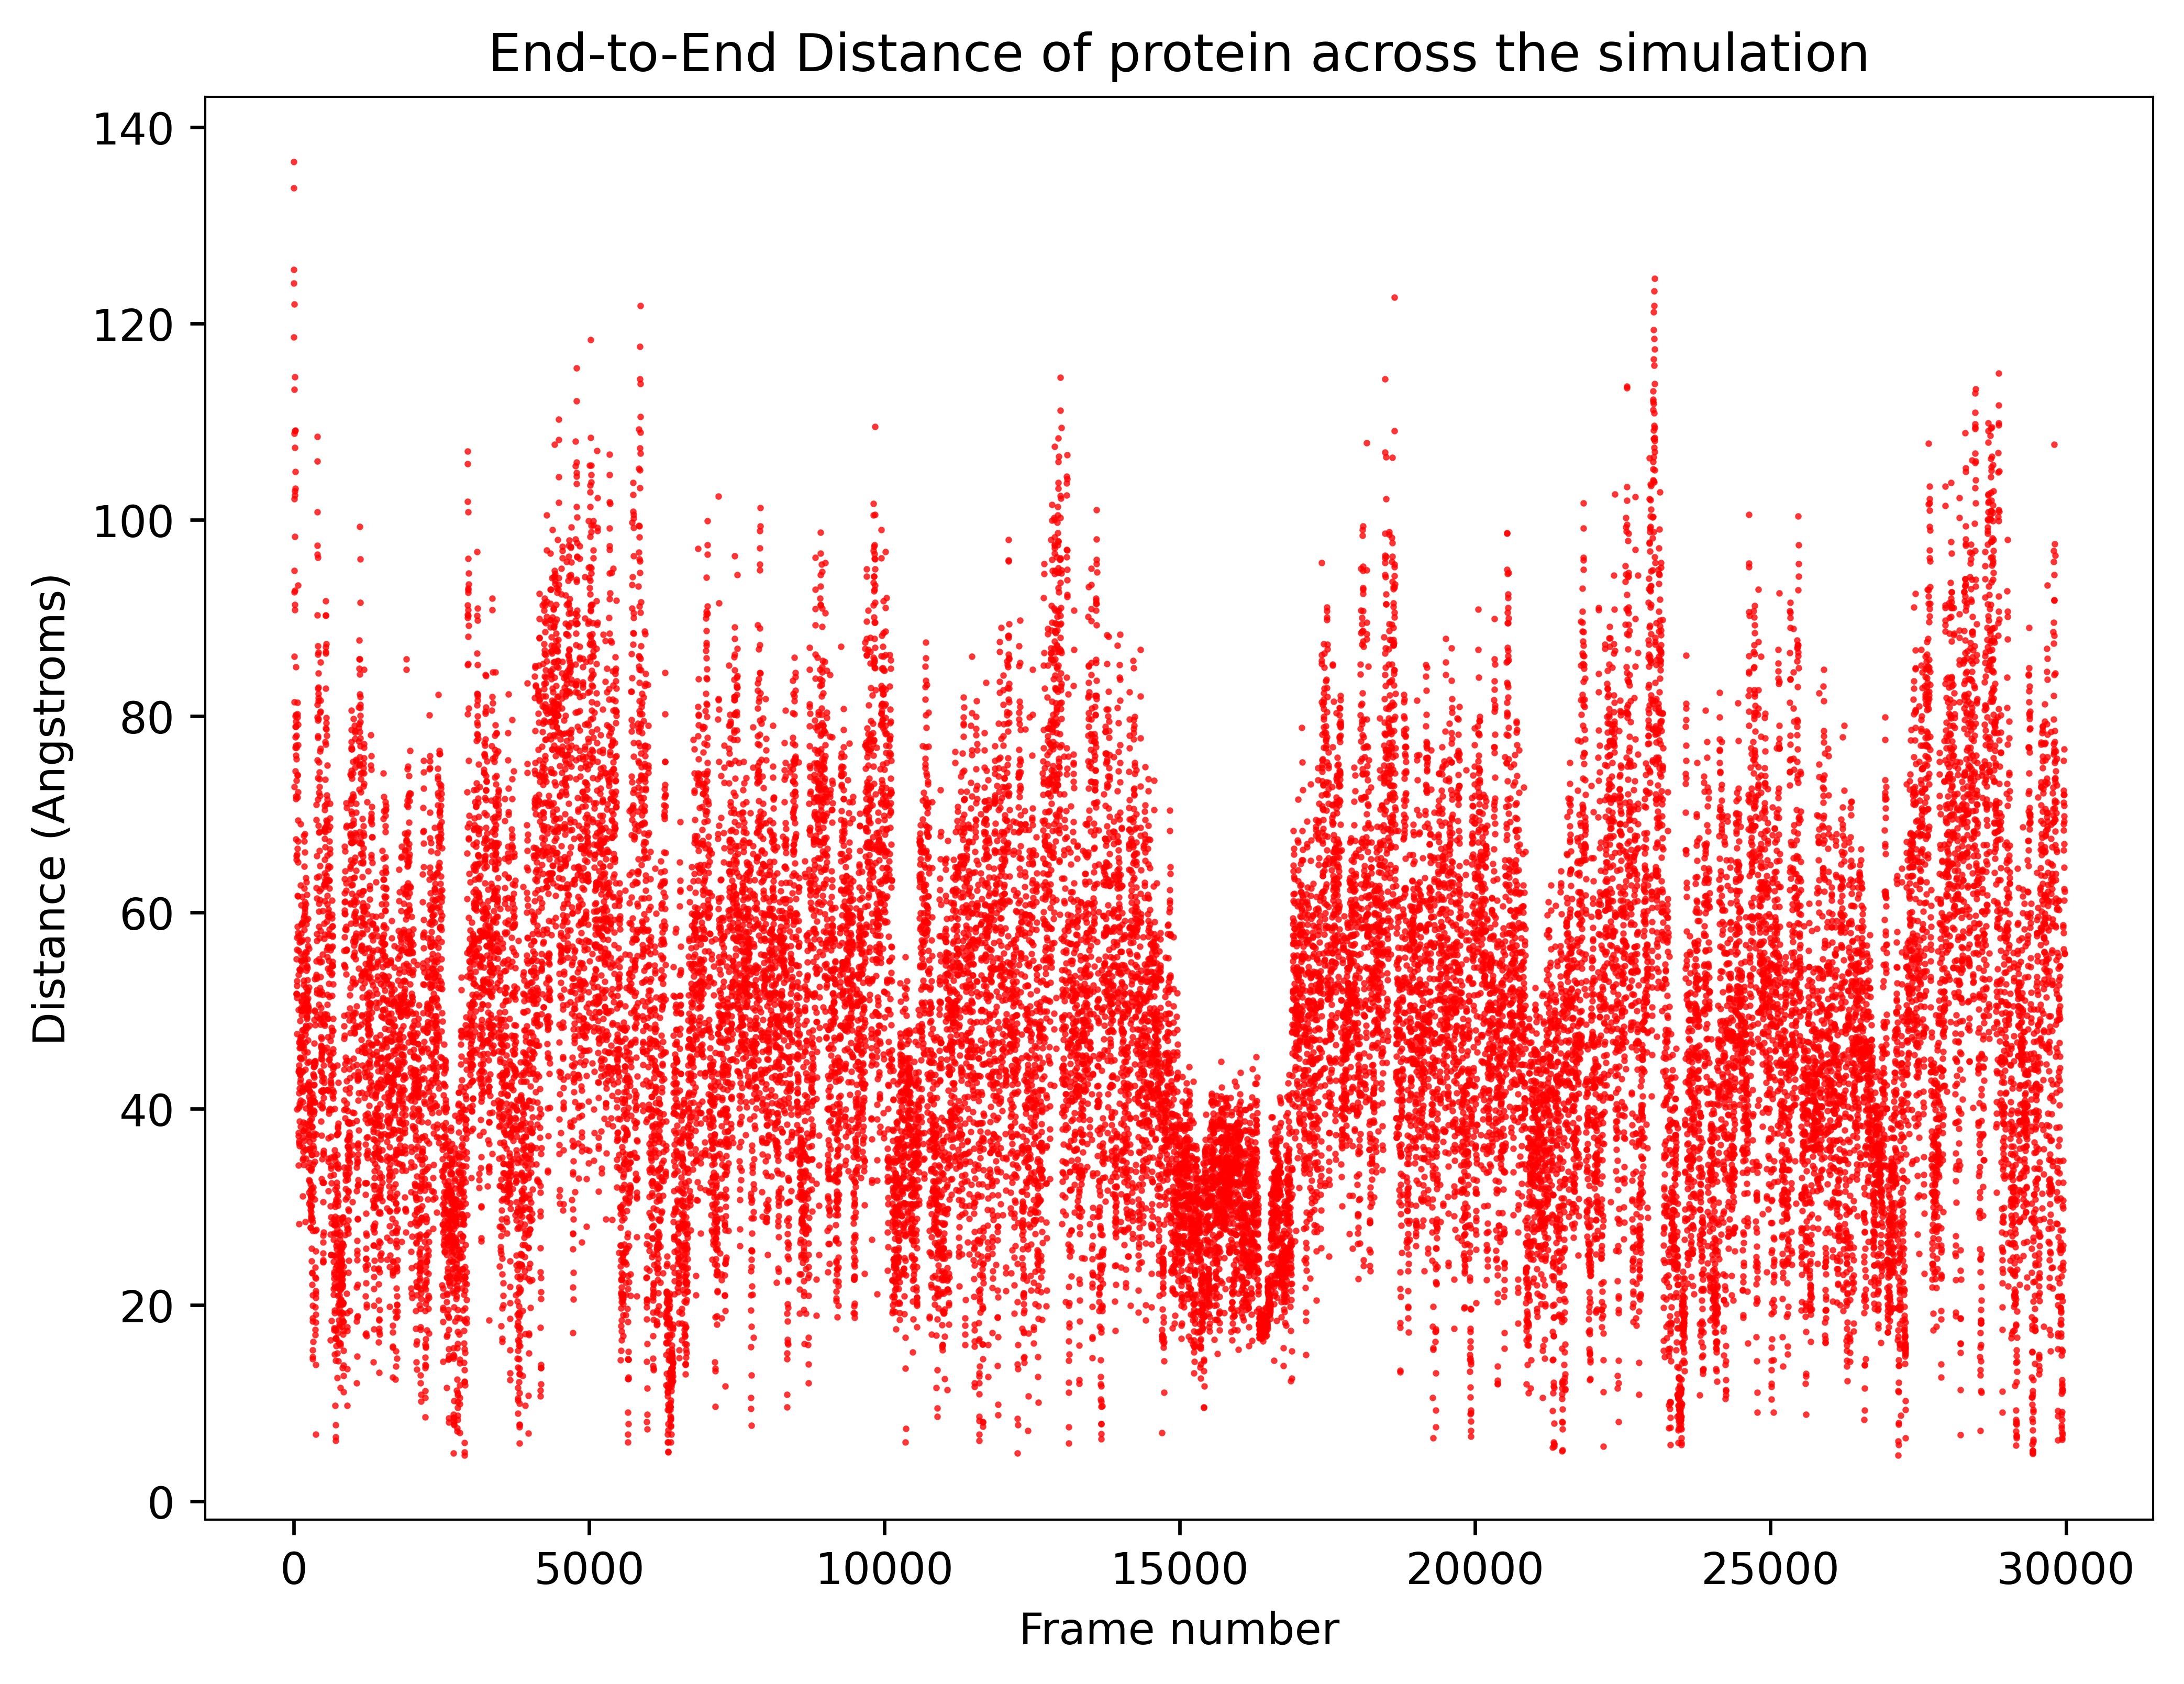

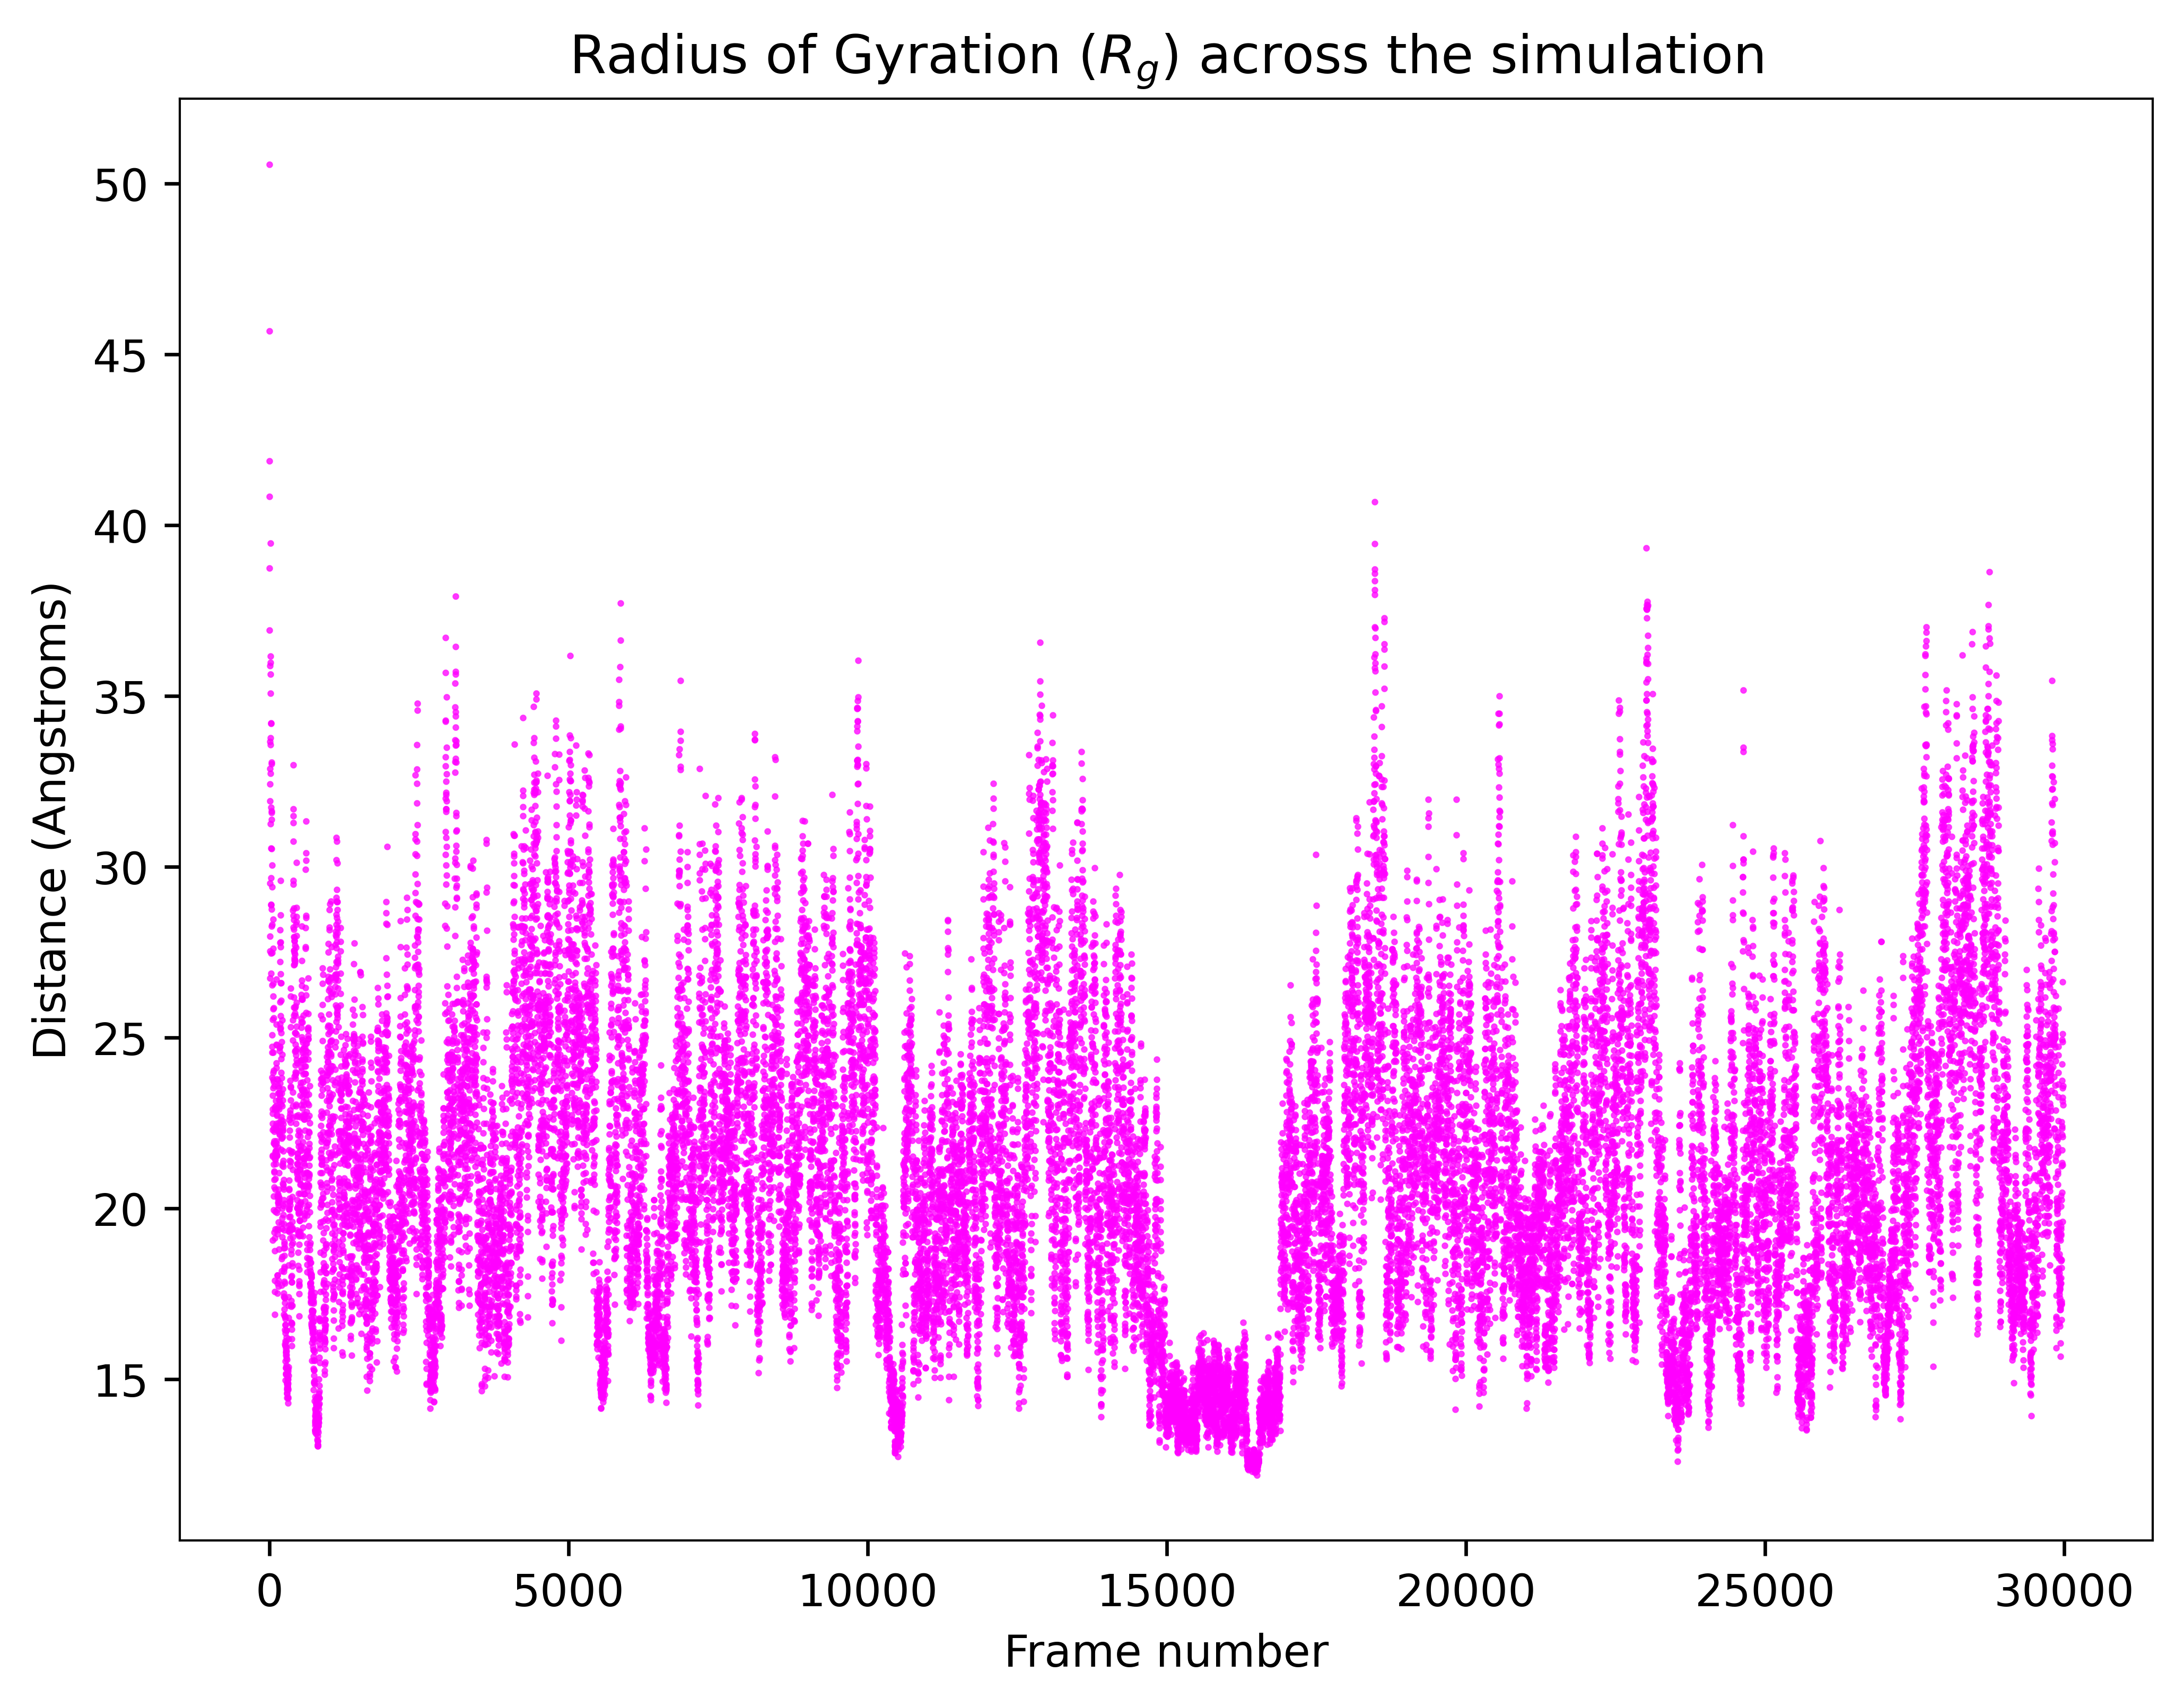

In [37]:
def plot_end_to_end_distance(end_to_end_distance, savename, title, color):
    """This plot displays the end to end distance in a scatter plot representation.
    The basis for this is to visually discern the extent to which the protein has
    undergone compaction or elongation, and which state dominates.
        @param end_to_end_distance: a 1D `numpy.array` or list which contains the
                                    end-to-end distance calculation (in Angstroms)
                                    across the entire simulation.
                                    
        @param savename: The filename (str) to use when saving the plot.
        
        @param title: The title (str) of the plot.
        
        @param color: The color (str) to use when generating the plot.
        
        @return None
    """
    num_points = len(end_to_end_distance)
    
    fig = plt.figure(figsize=(8, 6), dpi=300)
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Frame number')
    ax.set_ylabel('Distance (Angstroms)')
    ax.scatter(range(num_points), end_to_end_distance, marker='.', s=1, ls='-', color=color, alpha=0.8)
    plt.show()
    fig.savefig(savename)
    plt.close(fig)


# Calculate and plot the end-to-end distance.
end_to_end_distance = protein.get_end_to_end_distance()

savename = 'actr_e2e_distance.pdf'
title1 = 'End-to-End Distance of protein across the simulation'
color = 'red'
plot_end_to_end_distance(end_to_end_distance, savename, title1, color)

savename = 'actr_rg_distance.pdf'
title2 = 'Radius of Gyration ($R_g$) across the simulation'
color = 'magenta'
plot_end_to_end_distance(radius_of_gyration, savename, title2, color)

Examining the output from this measure, we confirm our observation that the simulation is indeed dominated by expanded behavior, but has also undergone compaction at various points in the simulation. We can get a more insightful understanding of these distances by calculating a 1D histogram of the end-to-end distance.

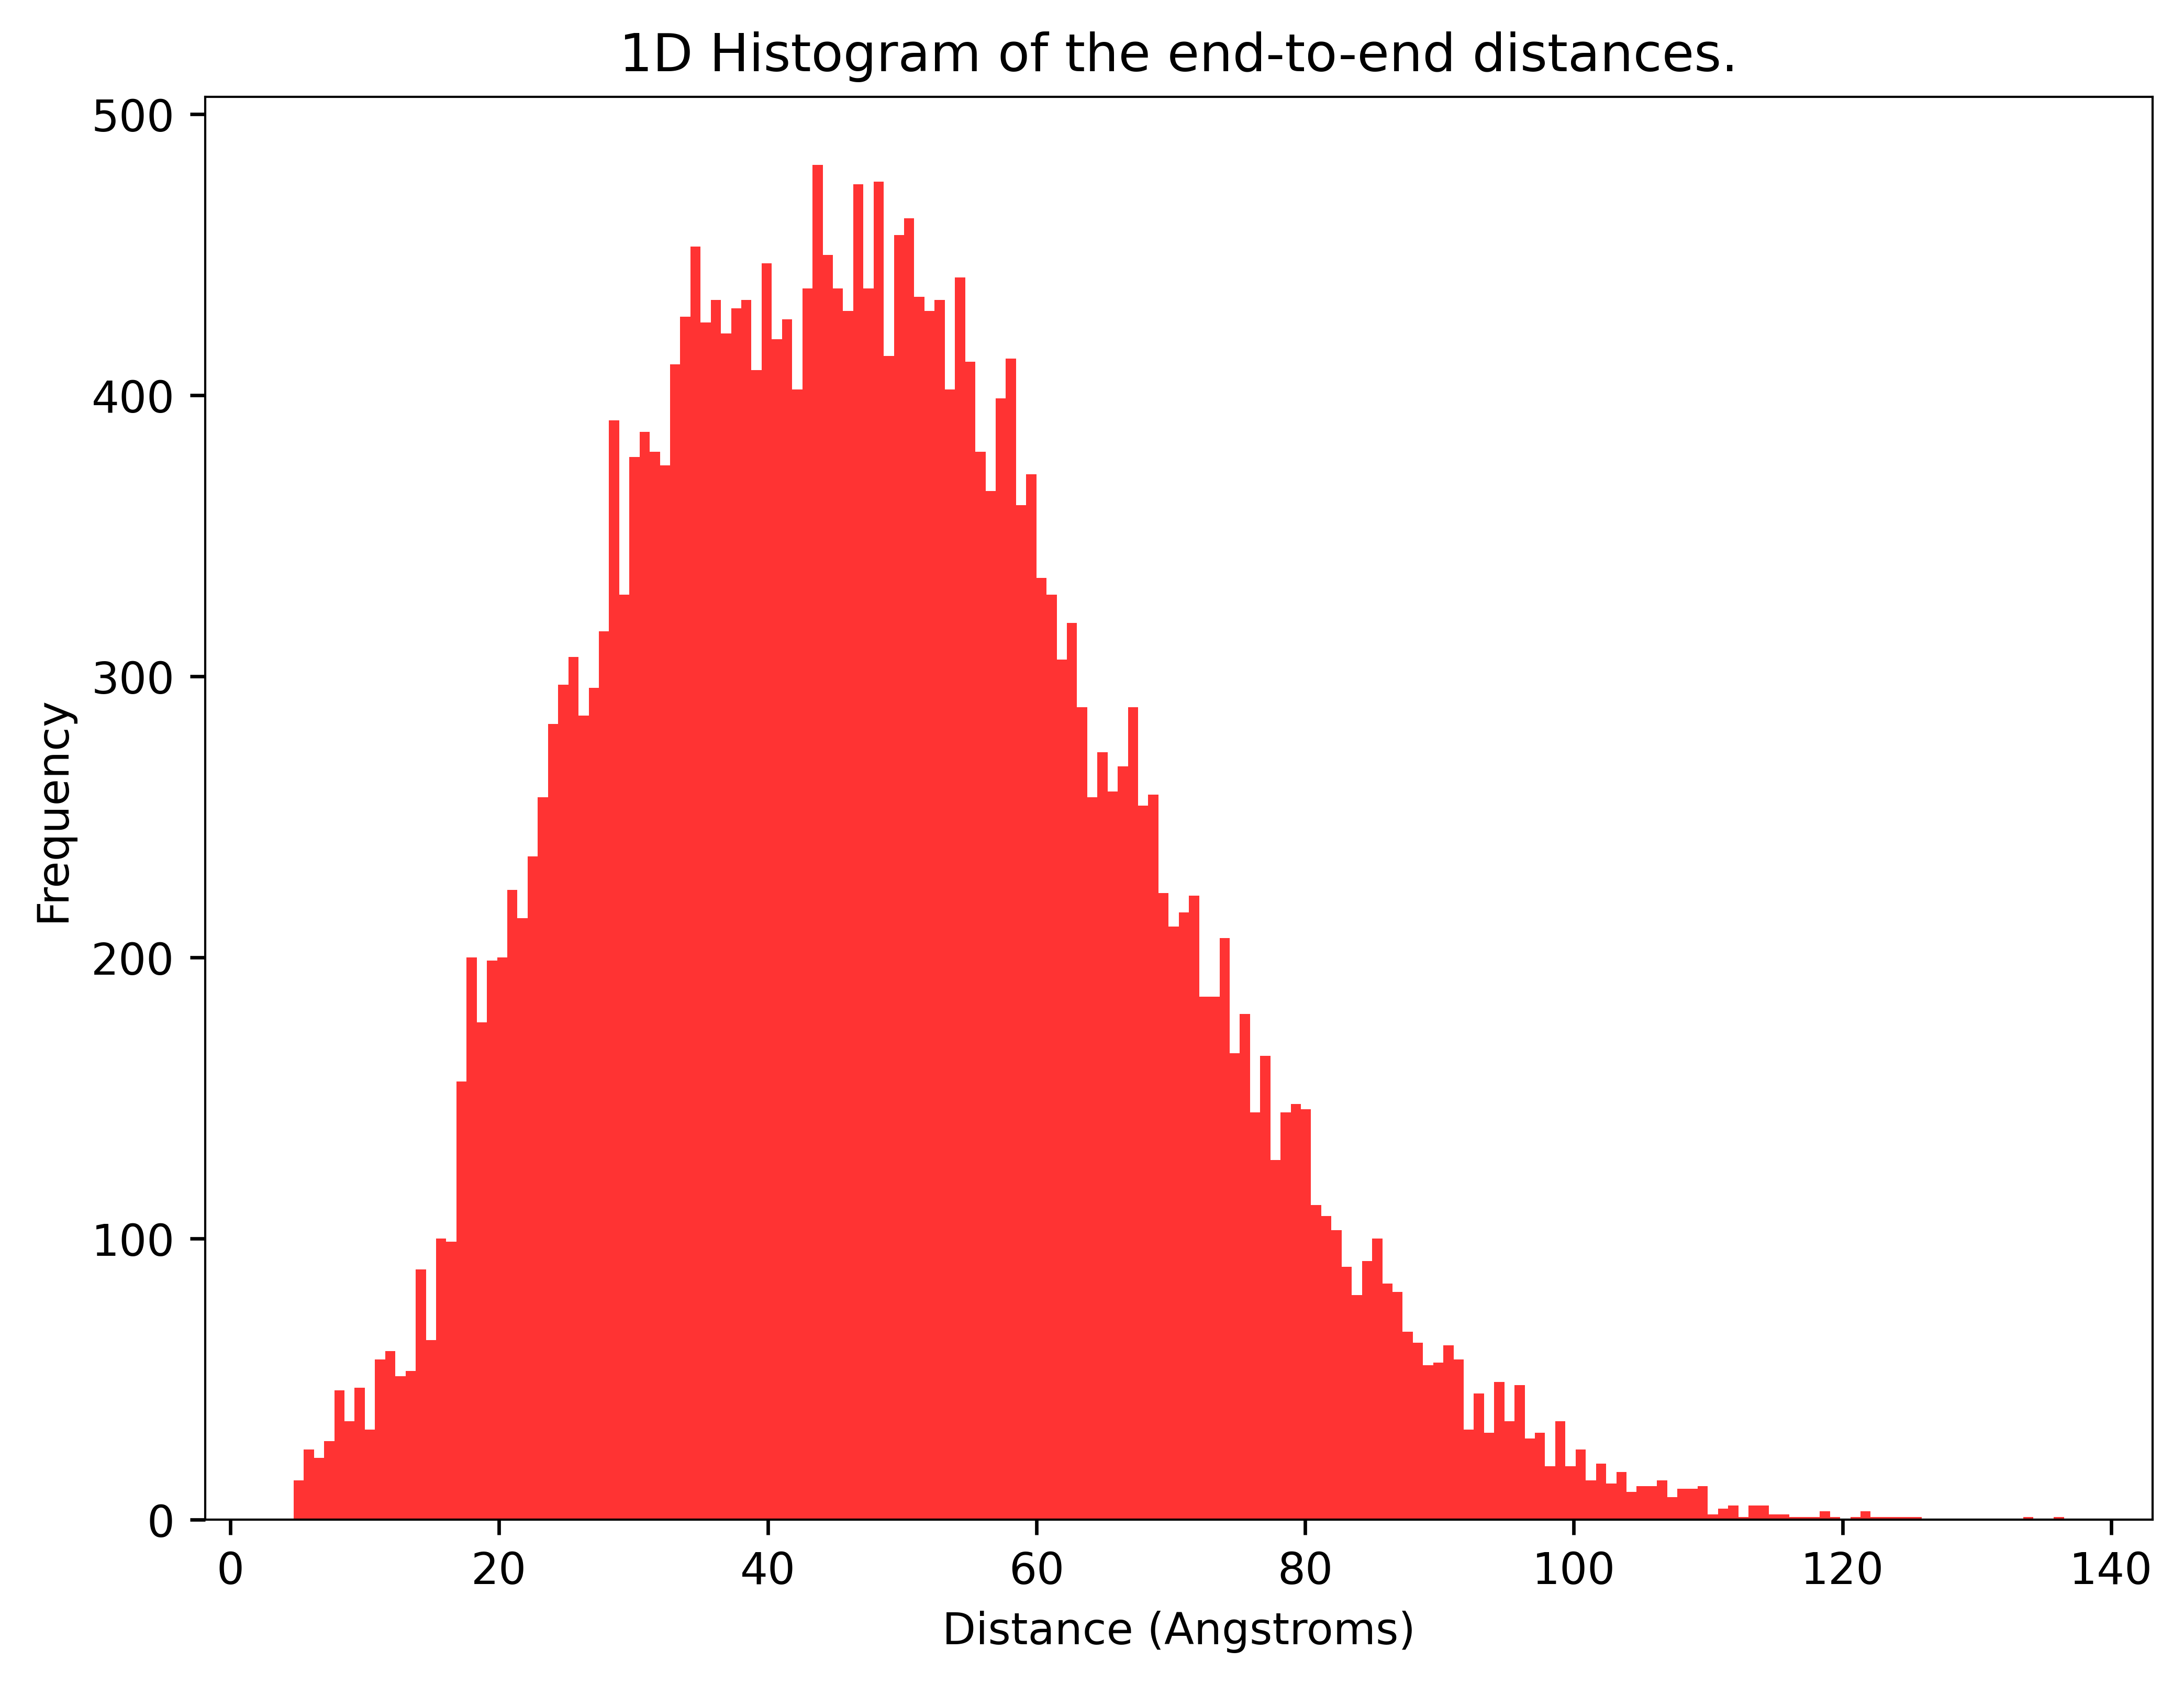

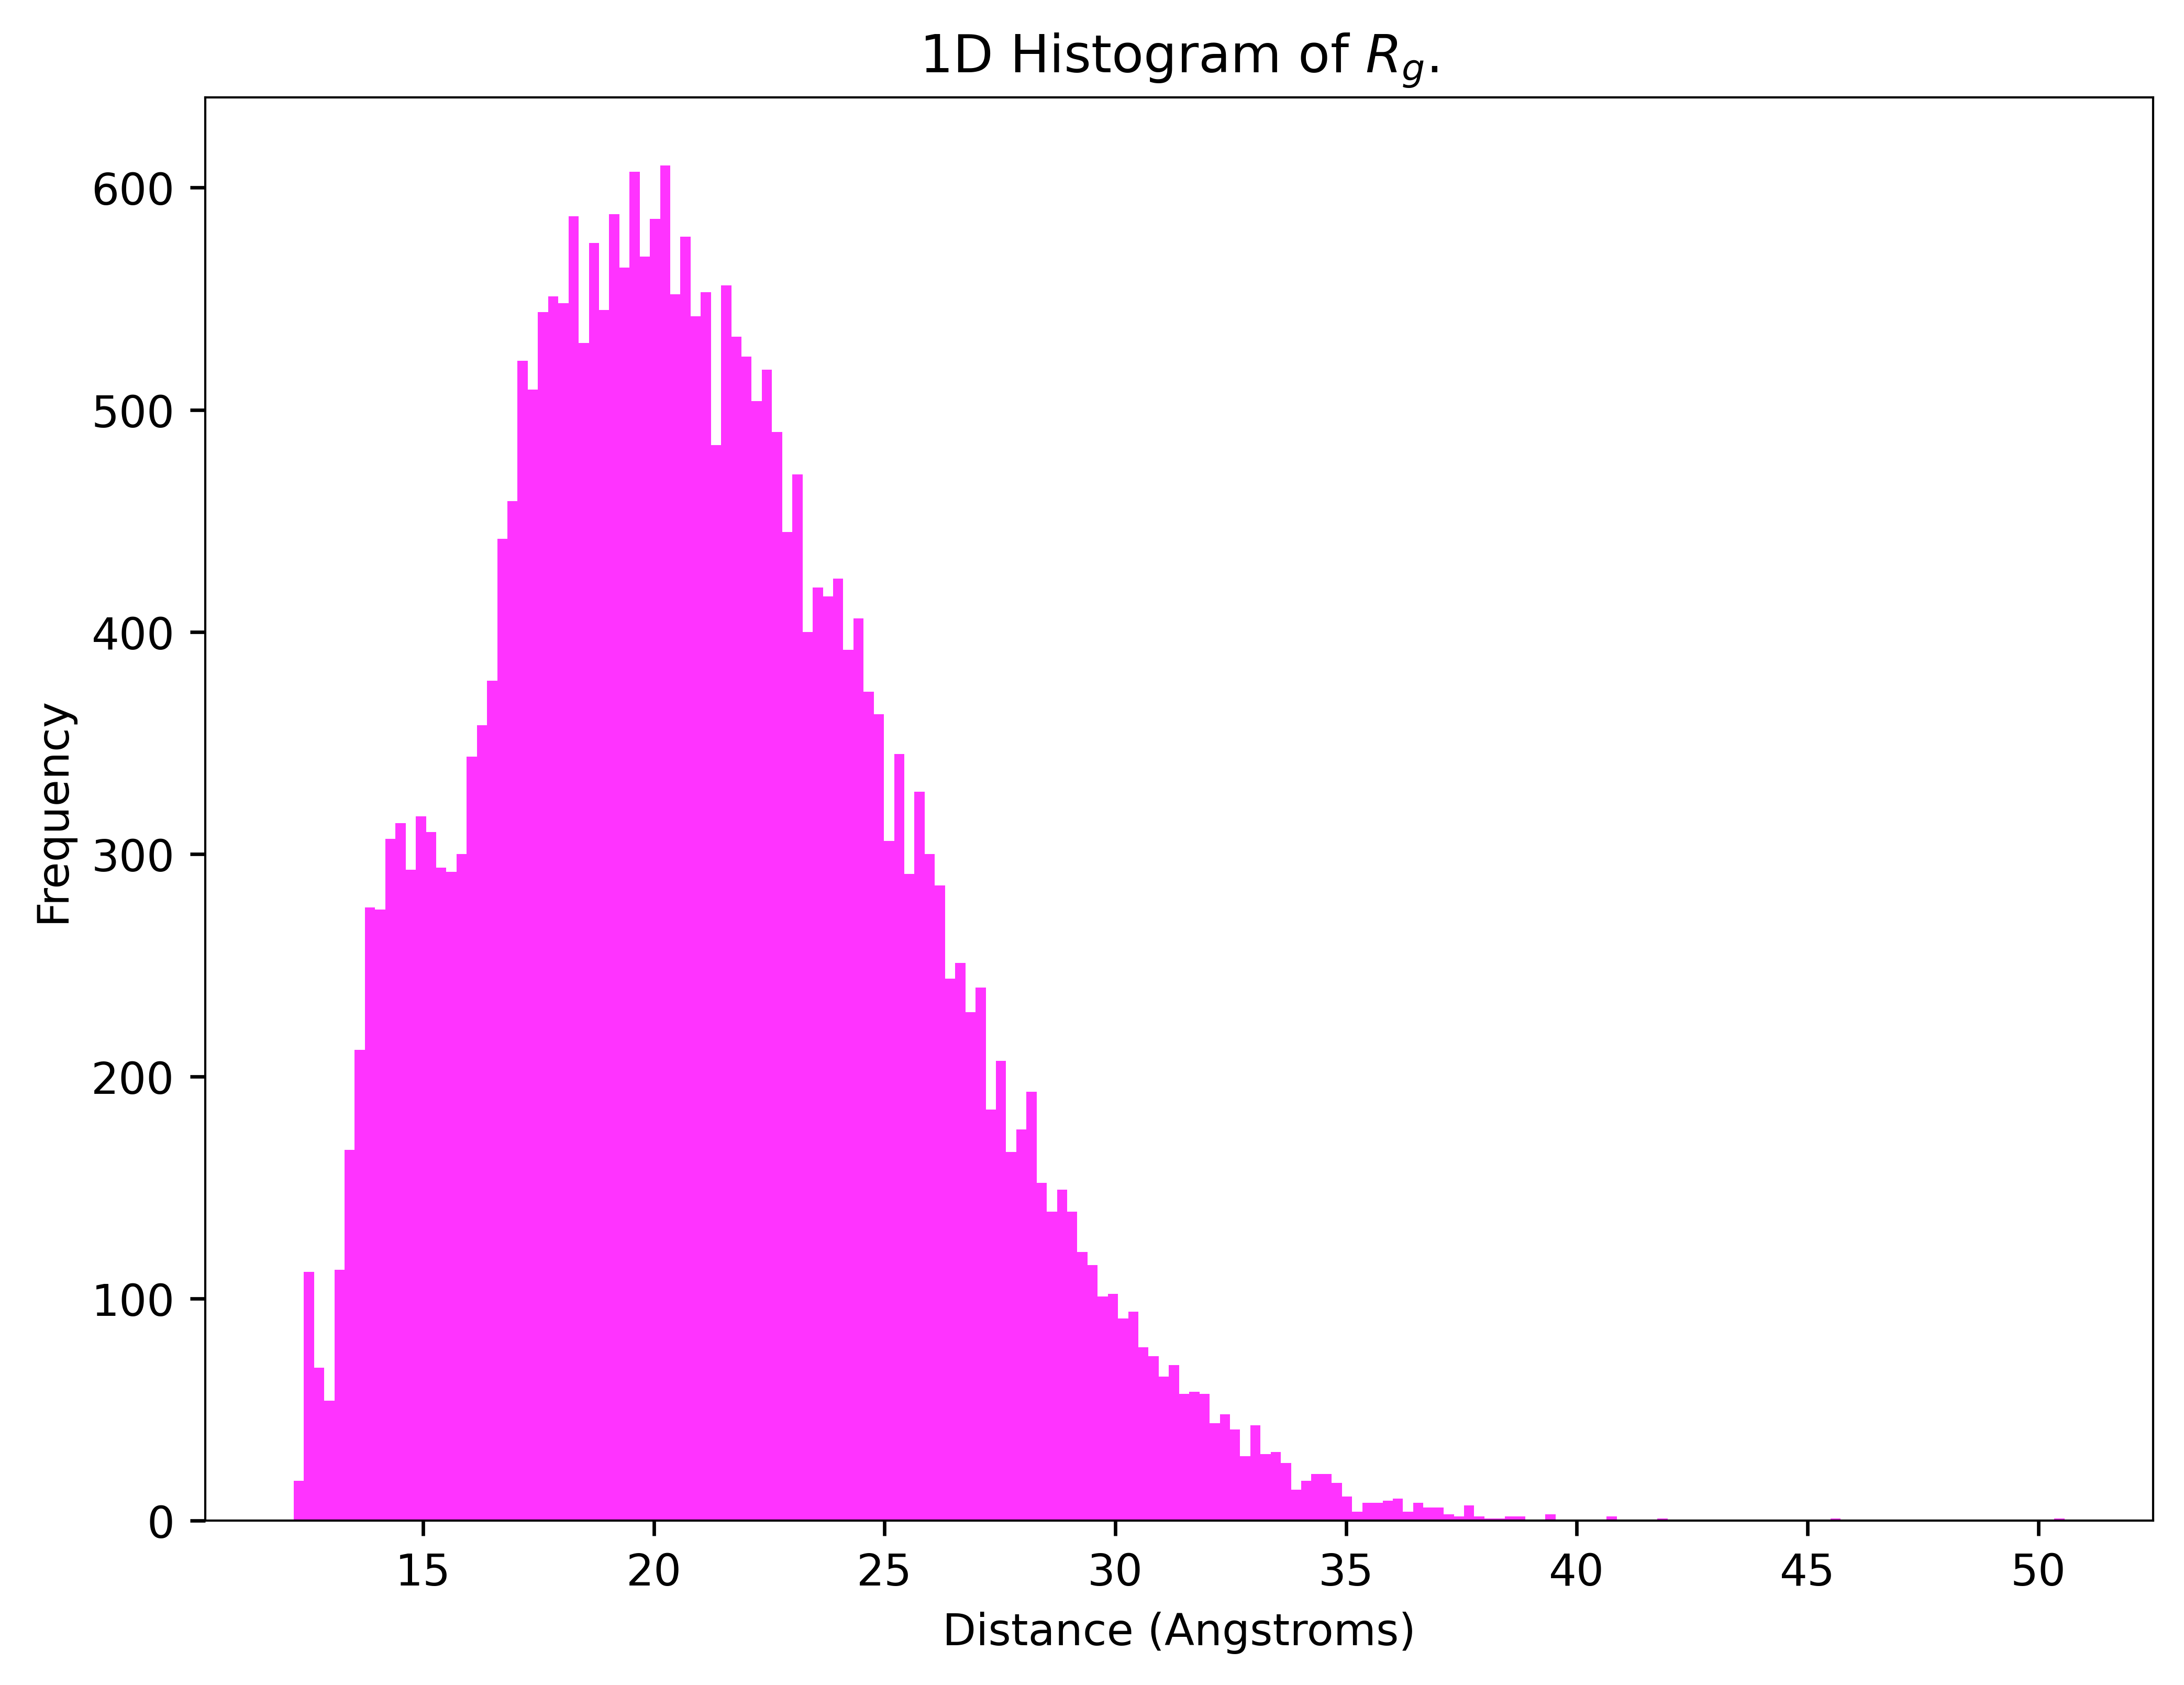

In [38]:
def plot_histogram_of_distances(end_to_end_distance, savename, title, color, bins=None):
    """This function provides an easy method to examine and quantify the distribution
    of end-to-end distances 
        @param end_to_end_distance: a 1D `numpy.array` or list which contains the
                                    end-to-end distance calculation (in Angstroms)
                                    across the entire simulation.
                                    
        @param savename: The filename to use when saving the plot.
                                    
        @param title: The title (str) of the figure.
        
        @param color: The color (str) to use when creating the histogram.
                                    
        @param bins: The number of bins to use when calculating the 1D histogram.
                     If no number is provided, a default is calculated using
                     the square-root rule. Other rules can be used, but care
                     should be taken as the distances do not meet the criterion
                     for following a normal distribution.
        
        @return None
    """
    num_bins = bins
    if bins is None:
        # Use the square-root rule to determine the appropriate number of bins
        num_bins = int(np.ceil(len(end_to_end_distance)**(1.0/2.0)))

    fig = plt.figure(figsize=(8, 6), dpi=300)
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Distance (Angstroms)')
    ax.set_ylabel('Frequency')
    hist = ax.hist(end_to_end_distance, num_bins, alpha=0.8, color=color)
    plt.show()
    fig.savefig(savename)
    plt.close(fig)
    

# Plot the 1D histogram of the end-to-end distance.
title1 = '1D Histogram of the end-to-end distances.'
savename = 'actr_e2e_hist.pdf'
color = 'red'
plot_histogram_of_distances(end_to_end_distance, savename, title1, color)

title2 = '1D Histogram of $R_g$.'
savename = 'actr_rg_hist.pdf'
color = 'magenta'
plot_histogram_of_distances(radius_of_gyration, savename, title2, color)

Examining this distribution, it is evident that both the end-to-end distance and $R_g$ are asymmetric and have a positive skew (skewed to the left). This indicates that in general, the system has a larger median end-to-end distance and average end-to-end distance is larger than the value found at the peak (i.e. the mode). In essence, this validates our visual examination of the scatter-plot of the end-to-end distance: the system tends to be more expanded than compact.

Let's smooth the distribution and apply a smoothing function using a 1D kernel density estimator to characterize the overall profile. Here we only focus on $R_g$ as that's a more informative parameter than the end-to-end distance.

In [45]:
from scipy.stats import gaussian_kde


def build_kde_line(indata, bins, covariance_factor=0.2):
    """This function that builds a kernel density estimate from a 1D matrix
    using a set of bins and a defined covariance factor. Smaller covariance 
    the tighter the fitting.
        @param indata: a 1D `numpy.array` or list containing the data which
                       will be histogrammed and smoothed using a Gaussian KDE.
        
        @param bins: the bins to use when histogramming the input, `indata`.
        
        @param covariance_factor: The bandwidth to use when smoothing. Larger
                                  values apply more smoothing.
        
        @return `numpy.array`: The smoothed KDE profile of the input data within
                               the `bins`.
    """
    
    # sets the histogram bin width
    binwidth = bins[1] - bins[0]
    
    density = gaussian_kde(indata)
    density.covariance_factor = lambda : covariance_factor
    density._compute_covariance()
    
    return density(bins)*binwidth


def get_all_histodata(local_rg_data, local_rg_bins):
    """This function computes a population distribution based on the input
    data within the limits provided, `local_rg_bins`. Moreover, it also
    calculates and returns a Gaussian KDE of the 1D histogram which can
    be used to quantify the underlying population distribution.
    
        @param local_rg_data: A `numpy.array` or `list` which will be used
                              to calculate the 1D histogram and its
                              corresponding Gaussian KDE profile.
                              
        @param local_rg_bins: A 1D `numpy.array` corresponding to the bin
                              edges to use when histogramming the data and
                              building the profile.
                            
        @return tuple: A 2-tuple corresponding to the 1D histogrammed data
                       and the Gaussian KDE profile derived from the same.
    """
    # compute histogram heights and then normalize to get p(Rg)
    local_rg_histodata = np.histogram(local_rg_data, bins=local_rg_bins)[0]
    local_rg_histodata = local_rg_histodata/sum(local_rg_histodata)
    
    # perform kernel density estimation to build smoothed curve 
    density_estimate = build_kde_line(local_rg_data, local_rg_bins)
    
    return (local_rg_histodata, density_estimate)
    
    
    
def plot_rg_distribution(local_rg_data, local_rg_bins, savename):
    """Plot a 1D distribution of the $R_g$ data within a defined limit as
    indicated by `local_rg_bins`. Additionally, this function also plots
    a smoothed profile using a Gaussian KDE to the histogram data.
    
        @param local_rg_data: A `numpy.array` or `list` which will be used
                              to calculate the 1D histogram and its
                              corresponding Gaussian KDE profile.
                              
        @param local_rg_bins: A 1D `numpy.array` corresponding to the bin
                              edges to use when histogramming the data and
                              building the profile.
                              
        @param savename: The name (str) under which the figure will be saved.
                              
        @return None
    """
    
    binwidth = local_rg_bins[1] - local_rg_bins[0]
    local_rg_histodata, density_estimate = get_all_histodata(local_rg_data, local_rg_bins)
    
    
    fig = plt.figure(figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    
    # plot raw data
    ax.bar(local_rg_bins[:-1]+binwidth*0.5, local_rg_histodata, alpha=0.4, color='b', width=binwidth*0.9)

    # plot the KDE profile
    ax.plot(bins, density_estimate,'r', linewidth=1, alpha=0.9)
    
    ax.set_title('Normalized probability distribution for $R_g$')
    ax.set_xlabel('$R_g$ (Angstroms)')
    ax.set_ylabel('Normalized Frequency, $p(R_g)$')
    
    plt.show()
    fig.savefig(savename)
    plt.close(fig)


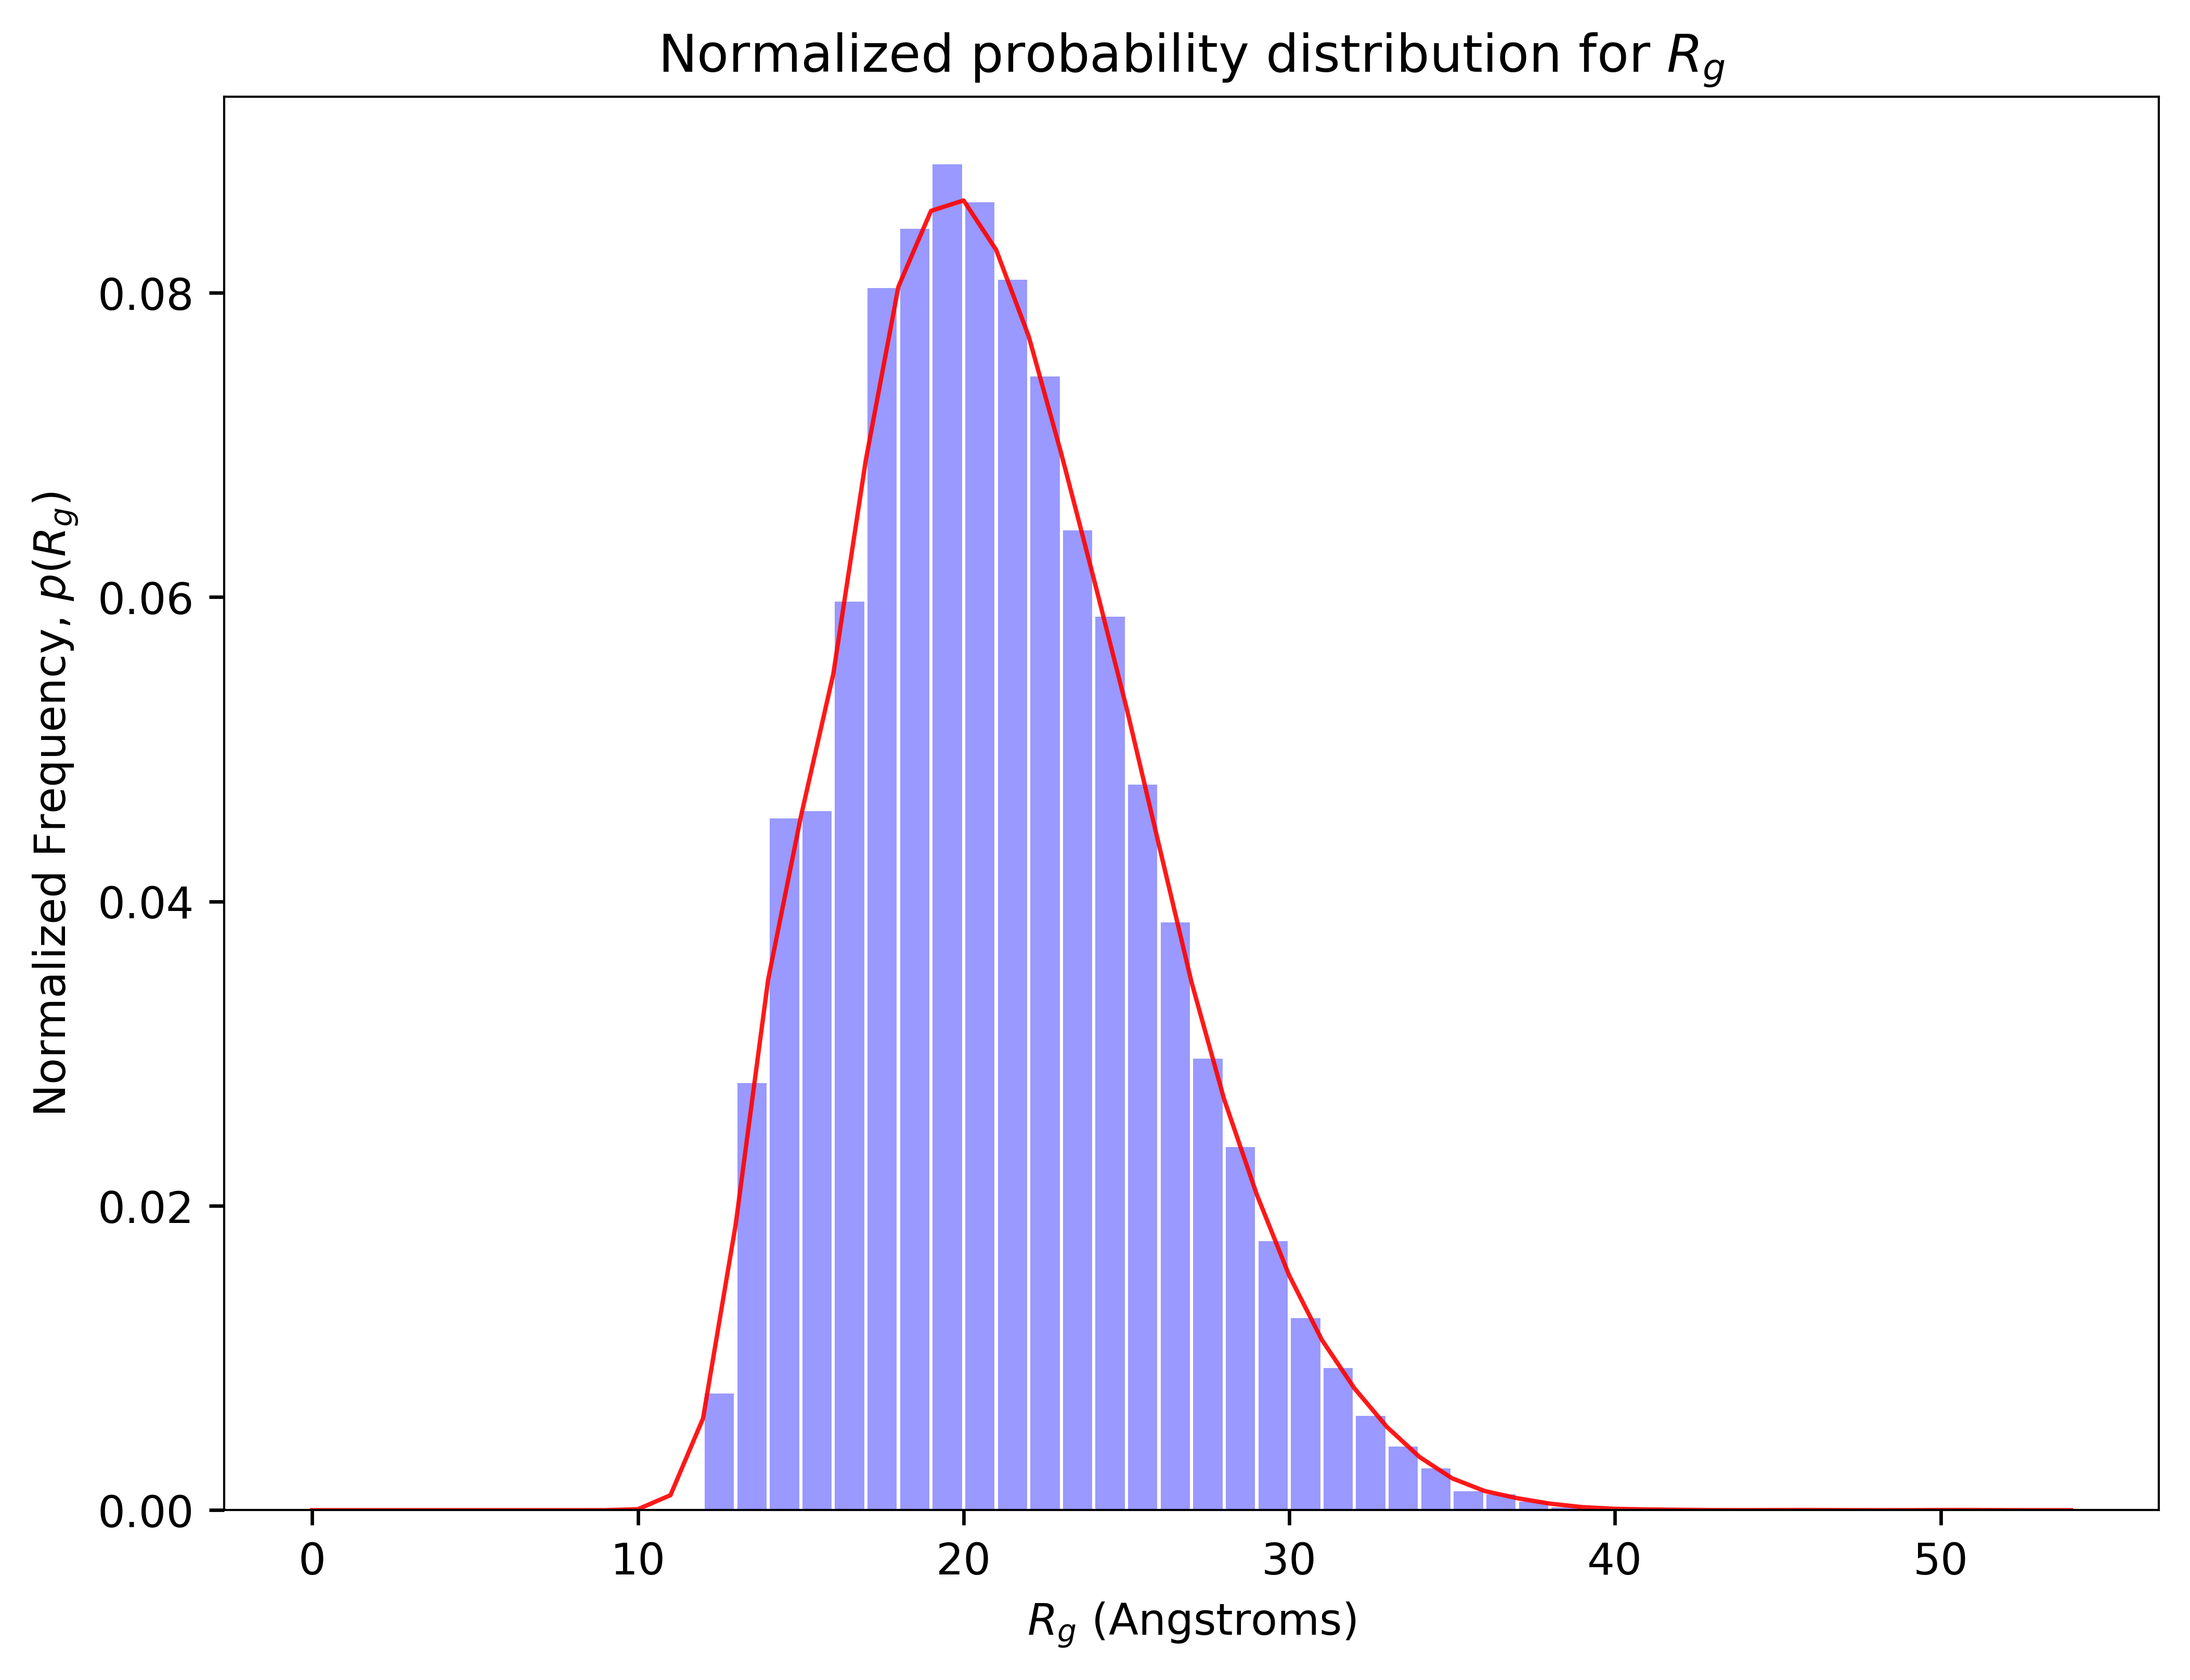

In [46]:
# Now plot and show the distribution of the radius of gyration
bins = np.arange(0, 55, 1)
savename = 'actr_rg_distribution.pdf'
plot_rg_distribution(radius_of_gyration, bins, savename)

### Internal Scaling

We can also get a more concrete perspective from the vantage of polymer-physics by calculating and comparing the protein's scaling exponent. Namely, we'll calculate and compare the internal scaling of the protein to different models of protein behavior such as the compact globule, an ideal chain, and the EV-limit.

In [47]:
# Define our starting and stopping residues, and calculate the RMS internal scaling values at
# a stride of 1 between both residues. Note the indices here should exclude the protein
# terminal caps (ACE / NME).
start_residue = 0
end_residue = 70
sep, internal_scaling = protein.get_internal_scaling_RMS(start_residue, end_residue)
scaling_exponent_properties = protein.get_scaling_exponent()

STATUS: Internal Scaling - on sequence separation 0 of 70
STATUS: Internal Scaling - on sequence separation 1 of 70
STATUS: Internal Scaling - on sequence separation 2 of 70
STATUS: Internal Scaling - on sequence separation 3 of 70
STATUS: Internal Scaling - on sequence separation 4 of 70
STATUS: Internal Scaling - on sequence separation 5 of 70
STATUS: Internal Scaling - on sequence separation 6 of 70
STATUS: Internal Scaling - on sequence separation 7 of 70
STATUS: Internal Scaling - on sequence separation 8 of 70
STATUS: Internal Scaling - on sequence separation 9 of 70
STATUS: Internal Scaling - on sequence separation 10 of 70
STATUS: Internal Scaling - on sequence separation 11 of 70
STATUS: Internal Scaling - on sequence separation 12 of 70
STATUS: Internal Scaling - on sequence separation 13 of 70
STATUS: Internal Scaling - on sequence separation 14 of 70
STATUS: Internal Scaling - on sequence separation 15 of 70
STATUS: Internal Scaling - on sequence separation 16 of 70
STATUS:

Running `protein.get_scaling_exponent()` returns a 9-tuple, of which the first 2 are perhaps the most applicable for obtaining a qualitative sense of the behavior of the system. Using that information and known scaling exponents which correspond to different cases, we can examine the behavior of the protein relative to that.

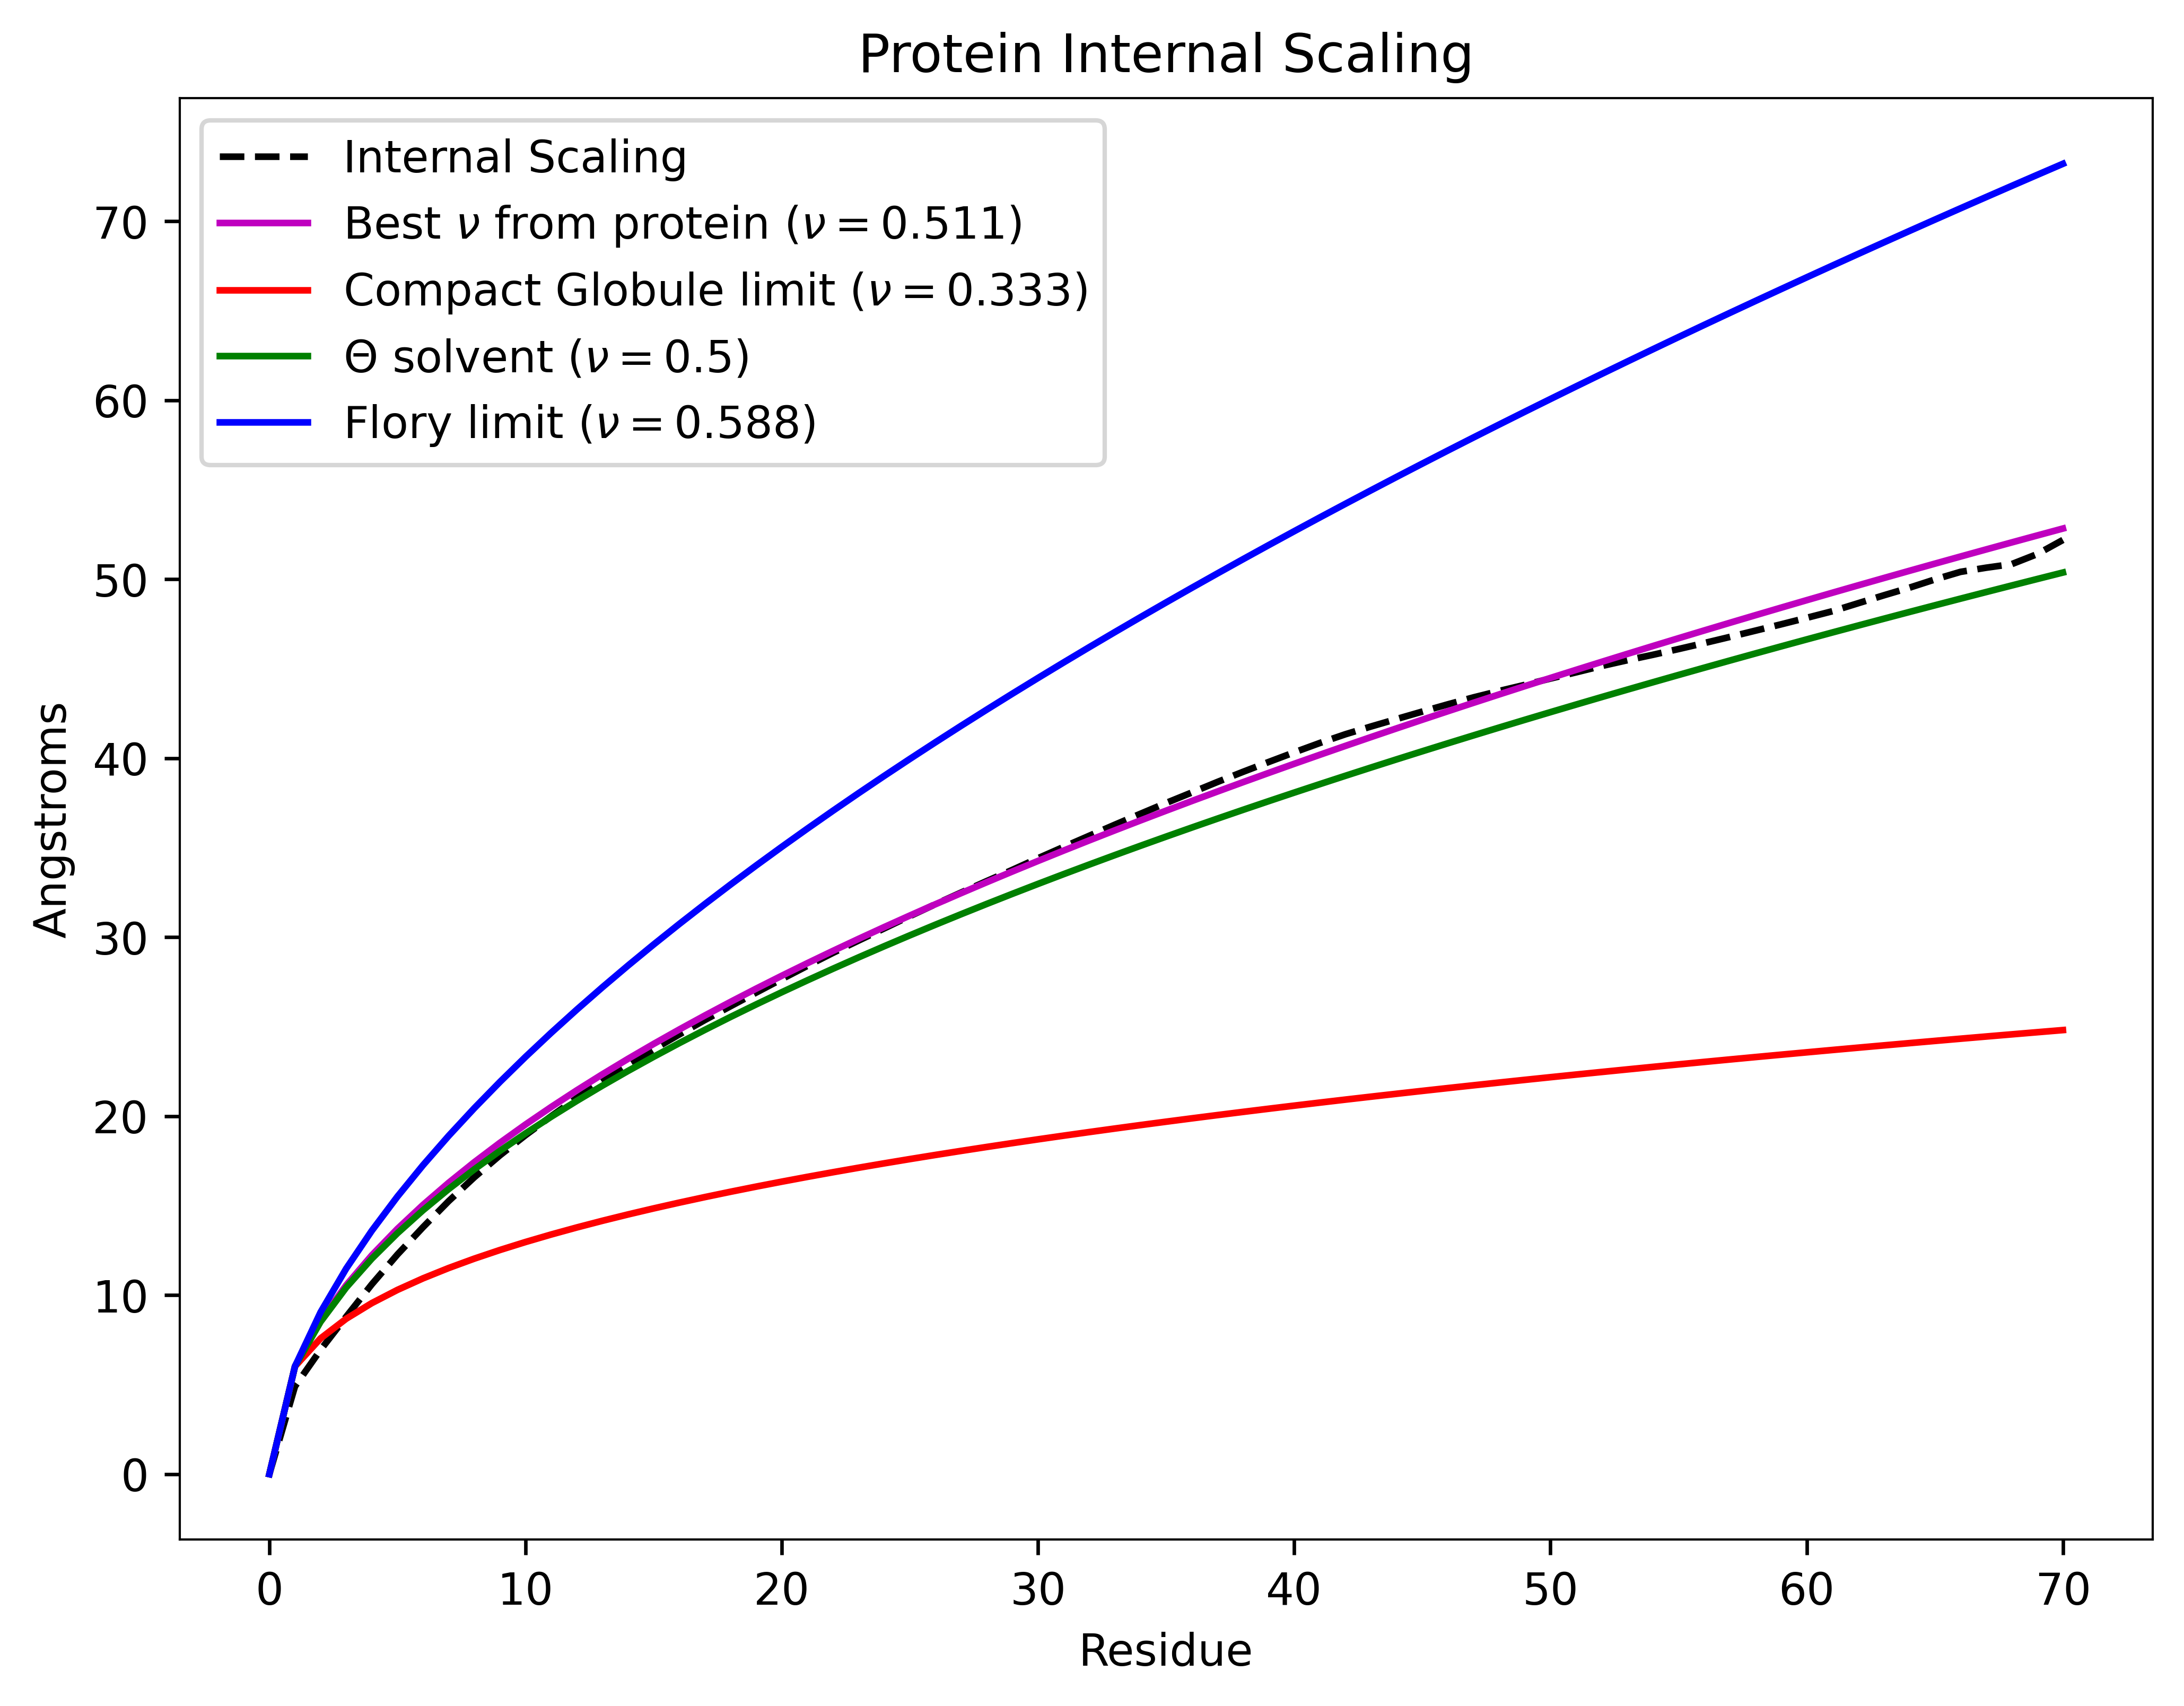

In [51]:
def calculate_protein_internal_scaling(xcoords, A0, nu):
    """This function calculates the scaling profile given an input array
    with a known $A_0$ and $\\nu$.
        @param xcoords: A 1D `numpy.array` corresponding to the residue location.
        @param A0: The prefactor for the protein scaling profile.
        @param nu: The Flory exponent.
        @return numpy.array: The calculated scaling profile.
    """
    x = np.array(xcoords)
    return A0*x**nu


def plot_scaling_exponent(internal_scaling, sep, best_A0, best_nu, savename):
    """This function plots the calculated scaling exponent and internal scaling
    against the profiles predicted by other common scaling profiles.
    
        @param internal_scaling: The calculated internal scaling derived from the
                                 protein between a starting and stopping residue
                                 index.
                                 
        @param sep: A 1D `numpy.array` corresponding to the residue locations.
        
        @param best_A0: The calculated prefactor for the protein scaling profile.
        
        @param best_nu: The calculated Flory exponent.
        
        @param savename: The filename to use when saving the plot.
        
        @return None
    """
    protein_scaling = calculate_protein_internal_scaling(sep, best_A0, best_nu)
    globule_scaling = calculate_protein_internal_scaling(sep, best_A0, 0.3333)  # bad solvent / compact globule
    theta_scaling = calculate_protein_internal_scaling(sep, best_A0, 0.5)  # theta solvent / ideal chain
    flory_scaling = calculate_protein_internal_scaling(sep, best_A0, 0.588)  # good solvent / EV-limit

    fig = plt.figure(figsize=(8, 6), dpi=300)
    ax = fig.add_subplot(111)
    ax.set_title('Protein Internal Scaling')
    ax.set_xlabel('Residue')
    ax.set_ylabel('Angstroms')
    ax.plot(sep, internal_scaling, 'k--', label='Internal Scaling')
    ax.plot(sep, protein_scaling, 'm-', label='Best $\\nu$ from protein ($\\nu={:.3f}$)'.format(best_nu))
    ax.plot(sep, globule_scaling, 'r-', label='Compact Globule limit ($\\nu=0.333$)')
    ax.plot(sep, theta_scaling, 'g-', label='$\\Theta$ solvent ($\\nu=0.5$)')
    ax.plot(sep, flory_scaling, 'b-', label='Flory limit ($\\nu=0.588$)')
    ax.legend()
    
    plt.savefig(savename)
    plt.show()
    plt.close(fig)
    

# Plot and compare the internal scaling profile of the protein to other simple protein models.
best_nu = scaling_exponent_properties[0]
best_A0 = scaling_exponent_properties[1]
savename = 'actr_scaling_exponent.pdf'
plot_scaling_exponent(internal_scaling, sep, best_A0, best_nu, savename)

From this we see that the protein behaves similar to an ideal chain - i.e. as though it is contained within a $\Theta$ solvent. While this seems puzzling at first glance, this is likely due to the balancing of chain-solvent and chain-chain interactions.[[2]](#References)

And, as a diagnostic measure, we can also examine the correlation between the end-to-end distance with $R_g$.

In [52]:
protein.get_end_to_end_vs_rg_correlation()

0.811265151420565

This correlation reflects the observations made through the various analyses performed.

## References

1. **Robustelli P, Piana S, Shaw DE. (2018)** Developing a molecular dynamics force field for both folded and disordered protein states. _Proc Natl Acad Sci USA._ **115:** E4758–E4766.

2. **Holehouse, A. S., & Pappu, R. V. (2018).** Collapse transitions of proteins and the interplay among backbone, sidechain, and solvent interactions. _Annual review of biophysics_, **47**, 19-39.